In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [17]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [18]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
# data

In [19]:
# data.info()
data.duplicated().sum()
data.drop_duplicates(subset=None, keep='first', ignore_index=False, inplace=True)
data.duplicated().sum()

0

In [20]:
mis_col = data.isnull().sum() * 100 /len(data)
# mis_col.sort_values(ascending=False)

In [21]:
# data.describe()

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Chol Outliers'}, xlabel='chol'>

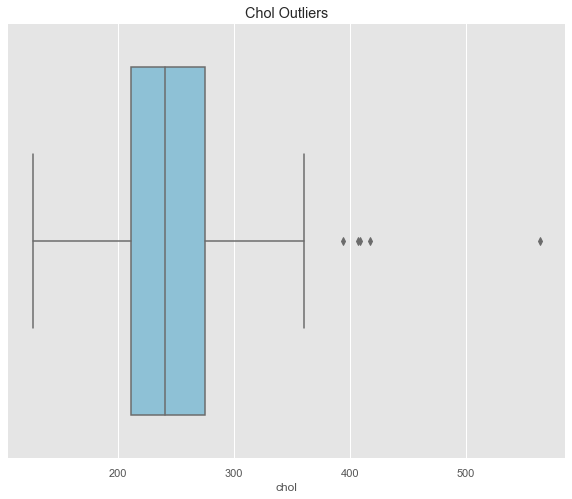

In [22]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Chol Outliers')

sns.boxplot(data.chol, color='c', ax=ax)

In [23]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

<AxesSubplot:title={'center':'Correlation Table'}>

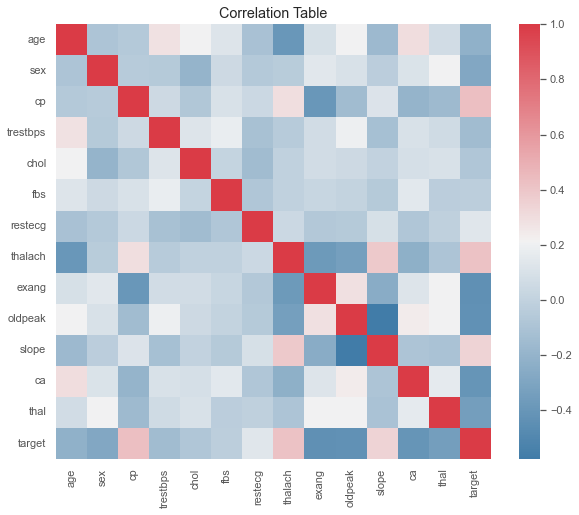

In [24]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Correlation Table')

data_corr = data.corr()
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True),
square=True, ax=ax)

In [25]:
y = data.target
x = data.drop(columns=['target'], axis=1)


In [26]:
num_val = ['age','trestbps','chol','thalach','oldpeak' ]
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

sex_val = data.sex

In [27]:
col_trans = ColumnTransformer( 
    [ 
        ('num', StandardScaler(), num_val),
        ('cat', OrdinalEncoder(), cat_val)
    ]
)

x = pd.DataFrame(col_trans.fit_transform(x))
x.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# transfo = [('num', StandardScaler(), num_val),('cat', OrdinalEncoder(), cat_val)]
# transform = ColumnTransformer(transformers=transfo)

In [29]:
# enco_data = [('num', StandardScaler(),num_val),('cat', OrdinalEncoder(),cat_val)]
# transformed_data = ColumnTransformer(transformers=enco_data)
# transformed_data
# x = transformed_data.fit_transform(x)



In [30]:
# col_trans = ColumnTransformer([ 
#     ('num', StandardScaler(), num_val),
#     ('cat', OrdinalEncoder(), cat_val)
# ])

# x = pd.DataFrame(col_trans.fit_transform(x))
# x

In [31]:
# ord_sex = data.sex 

# orig_dic_sex = np.unique(sex_val)
# ord_dic_sex = np.unique(ord_sex)

# sex_dictionary = dict(zip(orig_dic_sex,ord_dic_sex))
# sex_dictionary

In [32]:
# f,ax = plt.subplots(figsize=(10,8))
# ax.set_title('Target Sex distribution')
# sns.histplot(data[(data.sex==1)]['target'],color='c',ax=ax)

In [33]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [35]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [36]:
pred_logreg_train = logreg.predict(x_train)
pred_logreg_test = logreg.predict(x_test)

In [37]:
score_acc_logreg_train = accuracy_score(y_train, pred_logreg_train).round(3)
score_acc_logreg_test = accuracy_score(y_test, pred_logreg_test).round(3)

acu_perf = pd.DataFrame([ 
    'LogisticRegression', score_acc_logreg_train, score_acc_logreg_test
]).transpose()
acu_perf.columns = ['Method', 'Accuracy Train Score', 'Accuracy Test Score']
acu_perf

,Method,Accuracy Train Score,Accuracy Test Score
0,LogisticRegression,0.877,0.824


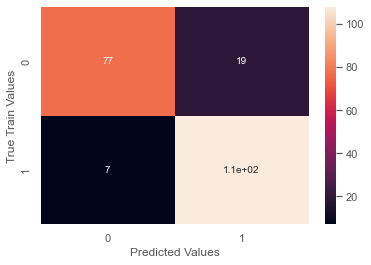

In [38]:
#Confusion Matrix are for classifiers and work same as any matrix

train_conmat = { 
    'y_train' : y_train,
    'pred_logreg_train': pred_logreg_train
}

data_matrix = pd.DataFrame( 
    train_conmat, columns=['y_train', 'pred_logreg_train']
)
confusion_matrix = pd.crosstab(data_matrix['y_train'], data_matrix['pred_logreg_train'], rownames=['True Train Values'], colnames=['Predicted Values'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

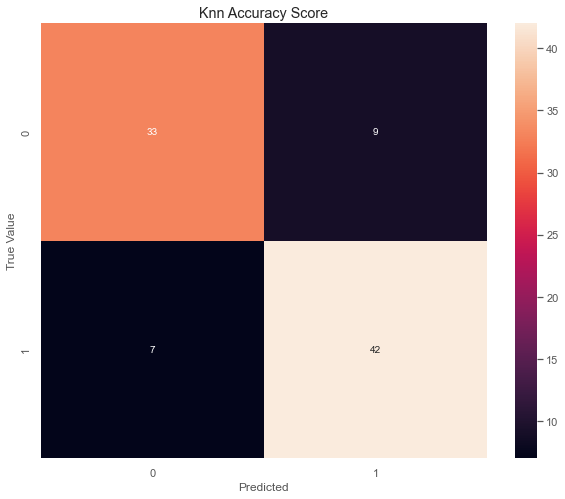

In [39]:

test_data = { 
    'y_test': y_test,
    'pred_logreg_test' : pred_logreg_test
}

con_matr = pd.DataFrame(test_data, columns=['y_test', 'pred_logreg_test'])

confusion_matrix = pd.crosstab(con_matr['y_test'], con_matr['pred_logreg_test'], rownames=['True Value'], colnames=['Predicted'])

f,ax =plt.subplots(figsize=(10,8))
ax.set_title('Knn Accuracy Score')
sns.heatmap(confusion_matrix, annot=True)

plt.show()

# Model Tuning

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Knn Accuracy Score'}>

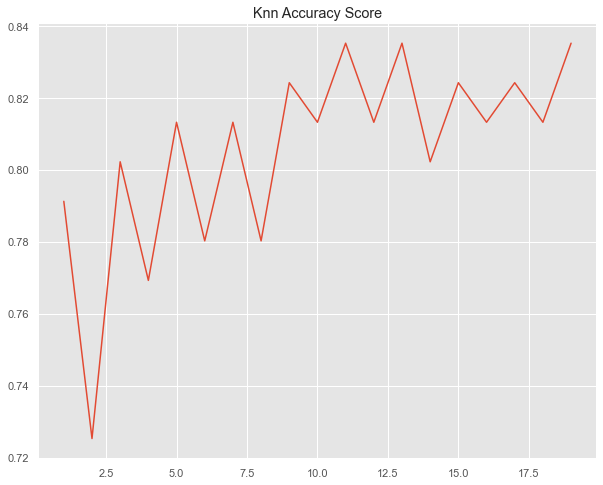

In [40]:
accuracies = []

for N in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=N)

    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_test, y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax =plt.subplots(figsize=(10,8))
ax.set_title('Knn Accuracy Score')
sns.lineplot(np.arange(1,20),accuracies)

In [41]:
k_best = 1 + np.argmax(accuracies)
best_accu = np.max(accuracies)

kn_res = pd.DataFrame([k_best, best_accu]).transpose()
kn_res.columns = ['k_best', 'best_acu']
kn_res

,k_best,best_acu
0,11.0,0.835165
